In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# this ensures the graphs are displayed

%matplotlib inline

In [3]:
df = pd.read_csv(r'file:///Users/Celona/Downloads/vaccinations_clean.csv', index_col = 0)

In [11]:
df.head()

,total_vacc,ppl_vacc,ppl_fully_vacc,daily_vacc_raw,daily_vacc,total_vacc_per_hund,ppl_vacc_per_hund,ppl_fully_vacc_per_hund,daily_vacc_per_mill
0,0.0,0.0,566029.0,24272.5,6788.5,0.00,0.00,9.46,2196.0
1,1357706.5,946578.0,566029.0,24272.5,1367.0,24.12,16.86,9.46,34.0
2,1357706.5,946578.0,566029.0,24272.5,1367.0,24.12,16.86,9.46,34.0
3,1357706.5,946578.0,566029.0,24272.5,1367.0,24.12,16.86,9.46,34.0
4,1357706.5,946578.0,566029.0,24272.5,1367.0,24.12,16.86,9.46,34.0


In [6]:
df.shape

(43145, 15)

In [10]:
del df['source_name']

## The elbow technique

In [12]:
num_cl = range(1, 10) #defines the rang of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] #defines kmean clusters in the range assigned above

In [13]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] #creates a score that represents 
# a rate of variation for the given cluster option

score

[-3.0663297622260135e+20,
 -9.264838833524641e+19,
 -3.959998175849361e+19,
 -2.875999776416994e+19,
 -2.0559405645459624e+19,
 -1.5888544713070555e+19,
 -1.245905782103849e+19,
 -1.0516143122413021e+19,
 -8.657275029437669e+18]

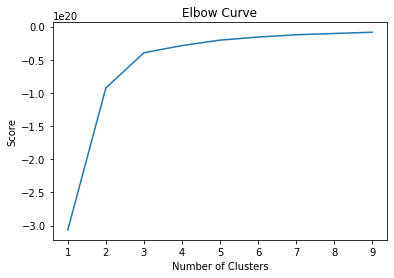

In [21]:
# plot the elbow curve using pylab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### There is a huge jump between 1 to 3 then the curve straightens out. So I'm going to use 3 as an optimal count for clusters.

## k-means clustering

In [14]:
# create the k-means object

kmeans = KMeans(n_clusters = 3, n_jobs = -1)


In [15]:
# fit the k-means object to the data

kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
df['clusters'] = kmeans.fit_predict(df)

In [32]:
df.head()

,total_vacc,ppl_vacc,ppl_fully_vacc,daily_vacc_raw,daily_vacc,total_vacc_per_hund,ppl_vacc_per_hund,ppl_fully_vacc_per_hund,daily_vacc_per_mill,clusters,cluster
0,0.0,0.0,566029.0,24272.5,6788.5,0.00,0.00,9.46,2196.0,0,pink
1,1357706.5,946578.0,566029.0,24272.5,1367.0,24.12,16.86,9.46,34.0,0,pink
2,1357706.5,946578.0,566029.0,24272.5,1367.0,24.12,16.86,9.46,34.0,0,pink
3,1357706.5,946578.0,566029.0,24272.5,1367.0,24.12,16.86,9.46,34.0,0,pink
4,1357706.5,946578.0,566029.0,24272.5,1367.0,24.12,16.86,9.46,34.0,0,pink


In [17]:
df['clusters'].value_counts()

0    42735
2      328
1       82
Name: clusters, dtype: int64

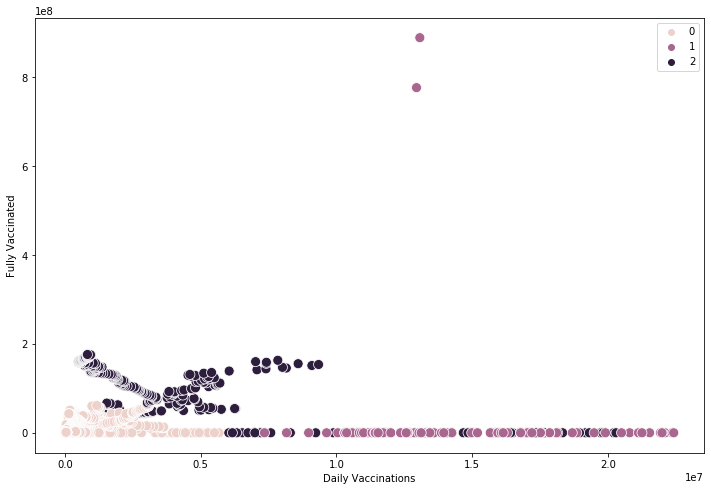

In [18]:
# plot the clusters for the "Daily_Vacc" and "People Fully Vaccinated" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['daily_vacc'], y=df['ppl_fully_vacc'], hue=kmeans.labels_, s=100)
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # this removes the grid from the background
plt.xlabel('Daily Vaccinations') # label x-axis
plt.ylabel('Fully Vaccinated') # labely-axis
plt.show()

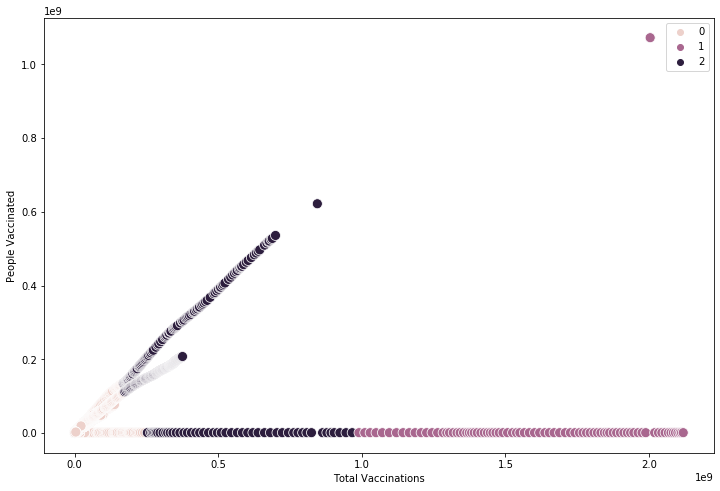

In [19]:
# plot the clusters for the "Total Vaccination" and "People Vaccinated" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['total_vacc'], y=df['ppl_vacc'], hue=kmeans.labels_, s=100)

ax.grid(False) # this removes the grid from the background
plt.xlabel('Total Vaccinations') # label x-axis
plt.ylabel('People Vaccinated') # labely-axis
plt.show()

#### This scatterplot shows that there are more total vaccinated people than there is vaccinated. Maybe there are more countries who's vaccines do not require 2 vaccines to be considered completely immunized.

In [20]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [22]:
to_csv('vaccinations.csv')

NameError: name 'to_csv' is not defined